In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
DIR = '/content/gdrive/My Drive/Spark/data/'

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import findspark
findspark.init("spark-2.4.4-bin-hadoop2.7")# SPARK_HOME

In [0]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName('Python Spark K-means example') \
        .config('spark.some.config.option', 'some-value') \
        .getOrCreate()



# Monte Carlo Simulation

## Casino Win


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start_m = 100
wager = 5
bets = 100
trails = 1000

trans = np.vectorize(lambda t: -wager if t <=0.51 else wager)

In [7]:
trans

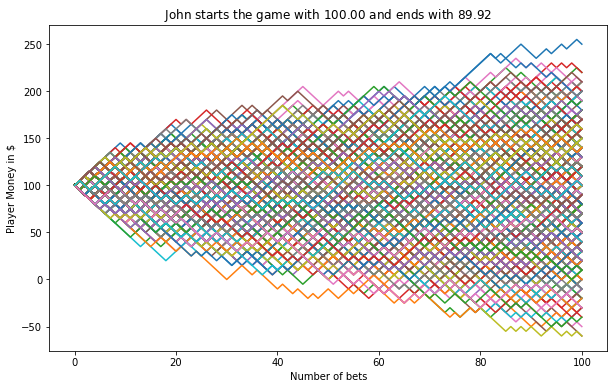

In [8]:
from functools import reduce

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)

end_m = []

for i in range(trails):
  money = reduce(lambda c, x: c +[c[-1]+x], trans(np.random.random(bets)), [start_m])
  end_m.append(money[-1])
  plt.plot(money)

plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.title(('John starts the game with $ %.2f$ and ends with $ %.2f$') %(start_m,sum(end_m)/len(end_m)))
plt.show()

## Random Walk

## Markov Chain Monte Carlo

In [0]:
import numpy as np

from scipy.stats import norm

def rnorm(n,mean,sd):
  return norm.rvs(loc=mean,scale=sd,size=n)

def dnorm(x,mean,sd,log=False):
  if log:
    return np.log(norm.pdf(x=x,loc=mean,scale=sd))
  else:
    return norm.pdf(x=x,loc=mean,scale=sd)

def runif(n,min=0,max=1):
  return np.random.uniform(min,max,size=n)

In [10]:
s2 = 1
t2 = 10
mu = 5
n = 5

y = rnorm(n,10,1)
y

array([ 9.41114781,  9.6488299 , 10.14185413, 11.1600542 , 11.15182163])

In [11]:
mu_n = (np.mean(y)*n/s2 + mu/float(t2))/(n/float(s2)+1/(float(t2)))
mu_n

10.198766209910527

In [12]:
t2_n = 1.0/(n/float(s2)+1.0/t2)
t2_n

0.19607843137254904

In [0]:
y = [9.37,10.18,9.16,11.60,10.33]

In [14]:
mu_n = (np.mean(y)*n/s2+mu/float(t2))/(n/float(s2)+1/float(t2))
mu_n

10.027450980392157

In [0]:
theta = 0
delta = 2

S = 10000
theta_v = []

for s in range(S):
  theta_star = norm.rvs(theta,np.sqrt(delta),1)
  logr = (sum(dnorm(y,theta_star,np.sqrt(s2),log=True))+
          sum(dnorm(theta_star,mu,np.sqrt(t2),log=True)))-\
          (sum(dnorm(y,theta,np.sqrt(s2),log=True))+
           sum(dnorm([theta],mu,np.sqrt(t2),log=True)))
          
  if np.log(runif(1))<logr:
    theta = theta_star
  theta_v.append(theta)

In [16]:
len(theta_v)

10000

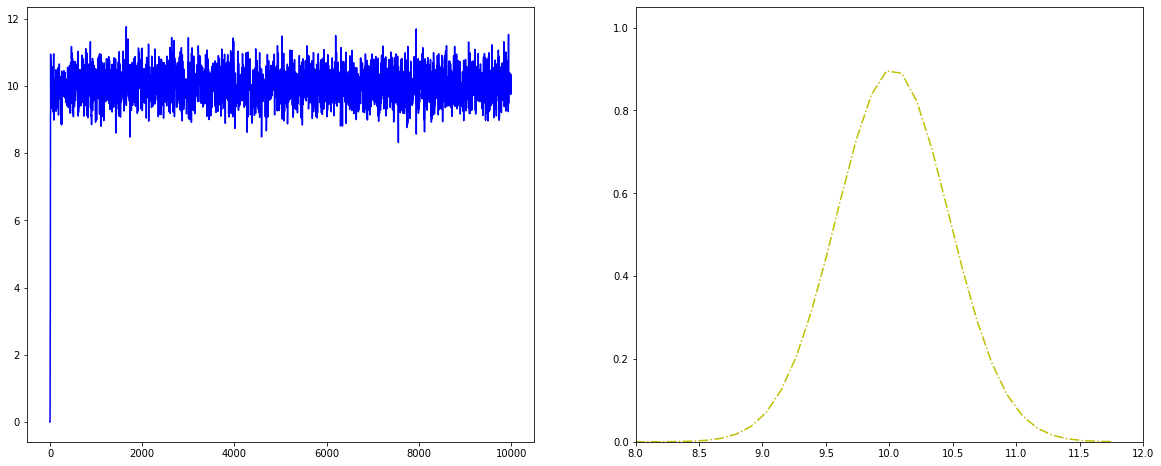

In [17]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(theta_v,'b-')

plt.subplot(1,2,2)
plt.hist(theta_v[theta_v!=0], density=True, bins='auto')
x = np.linspace(min(theta_v), max(theta_v), 100)
y = norm.pdf(x,mu_n,np.sqrt(t2_n))
plt.plot(x,y,'y-.')
plt.xlim(right=12)
plt.xlim(left=8)
plt.show()